In [1]:
!unzip "content/Bird.zip"

unzip:  cannot find or open content/Bird.zip, content/Bird.zip.zip or content/Bird.zip.ZIP.


In [2]:
!file /content/Bird.zip

/content/Bird.zip: cannot open `/content/Bird.zip' (No such file or directory)


In [ ]:
import zipfile

zip_path = "/content/Bird.zip"
extract_path = "/content/extracted_folder"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import shutil

zip_path = "/content/Bird.zip"
extract_path = "/content/Birds"

shutil.unpack_archive(zip_path, extract_path)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [5]:
train_gen = ImageDataGenerator(rescale=(1./255), horizontal_flip=True, shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))

In [6]:
import shutil, random, os
dirpath = '/content/drive/MyDrive/Birds'
destDirectory = './test'

filenames = os.listdir(dirpath)
filenames
# for fname in filenames:
#     srcpath = os.path.join(dirpath, fname)
#     shutil.copyfile(srcpath, destDirectory)
# filenamest

['test_data', 'train_data']

# CNN Model

In [7]:
train = train_gen.flow_from_directory("/content/drive/MyDrive/Birds/train_data/train_data", target_size=(64,64),class_mode='categorical', batch_size=8)

Found 150 images belonging to 16 classes.


In [8]:
test = test_gen.flow_from_directory("/content/drive/MyDrive/Birds/test_data/test_data", target_size=(64,64), class_mode='categorical', batch_size=8)

Found 157 images belonging to 16 classes.


In [9]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [10]:
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(train,batch_size=8,validation_data=test,epochs=20)

Epoch 1/20
19/19 [==============================] - 174s 9s/step - loss: 2.8434 - accuracy: 0.0933 - val_loss: 2.6912 - val_accuracy: 0.0955
Epoch 2/20
19/19 [==============================] - 85s 5s/step - loss: 2.4603 - accuracy: 0.1933 - val_loss: 2.6177 - val_accuracy: 0.2038
Epoch 3/20
19/19 [==============================] - 119s 6s/step - loss: 2.2473 - accuracy: 0.2733 - val_loss: 2.6560 - val_accuracy: 0.1975
Epoch 4/20
19/19 [==============================] - 84s 5s/step - loss: 2.1551 - accuracy: 0.3000 - val_loss: 2.6528 - val_accuracy: 0.1529
Epoch 5/20
19/19 [==============================] - 119s 6s/step - loss: 1.9799 - accuracy: 0.3933 - val_loss: 2.7252 - val_accuracy: 0.1720
Epoch 6/20
19/19 [==============================] - 118s 6s/step - loss: 1.7565 - accuracy: 0.5200 - val_loss: 2.6772 - val_accuracy: 0.1911
Epoch 7/20
19/19 [==============================] - 84s 5s/step - loss: 1.5892 - accuracy: 0.5267 - val_loss: 2.8078 - val_accuracy: 0.1720
Epoch 8/20
19/19

In [14]:
model.save('BirdsClassification.h5')

# Testing

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [21]:
img = image.load_img('/content/drive/MyDrive/Birds/train_data/train_data/blasti/DSC_6382.jpg',target_size=(64,64))

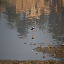

In [22]:
img

In [23]:
img = image.img_to_array(img)
img

array([[[ 70.,  58.,  44.],
        [ 89.,  68.,  49.],
        [ 98.,  78.,  53.],
        ...,
        [ 66.,  56.,  54.],
        [122.,  88.,  60.],
        [159., 110.,  80.]],

       [[ 63.,  57.,  45.],
        [ 57.,  55.,  40.],
        [ 71.,  65.,  49.],
        ...,
        [ 63.,  53.,  51.],
        [127.,  99.,  60.],
        [148., 105.,  73.]],

       [[ 62.,  58.,  47.],
        [ 58.,  54.,  42.],
        [ 86.,  74.,  60.],
        ...,
        [ 59.,  56.,  49.],
        [ 89.,  70.,  55.],
        [128.,  95.,  64.]],

       ...,

       [[ 84.,  67.,  51.],
        [ 79.,  63.,  50.],
        [ 80.,  63.,  55.],
        ...,
        [ 85.,  64.,  45.],
        [ 75.,  66.,  61.],
        [ 65.,  55.,  45.]],

       [[ 93.,  71.,  57.],
        [ 80.,  62.,  50.],
        [ 69.,  56.,  47.],
        ...,
        [ 60.,  45.,  26.],
        [ 75.,  58.,  42.],
        [ 62.,  45.,  35.]],

       [[ 97.,  72.,  52.],
        [112.,  97.,  56.],
        [ 73.,  

In [24]:
img = np.expand_dims(img,axis=0)
img

array([[[[ 70.,  58.,  44.],
         [ 89.,  68.,  49.],
         [ 98.,  78.,  53.],
         ...,
         [ 66.,  56.,  54.],
         [122.,  88.,  60.],
         [159., 110.,  80.]],

        [[ 63.,  57.,  45.],
         [ 57.,  55.,  40.],
         [ 71.,  65.,  49.],
         ...,
         [ 63.,  53.,  51.],
         [127.,  99.,  60.],
         [148., 105.,  73.]],

        [[ 62.,  58.,  47.],
         [ 58.,  54.,  42.],
         [ 86.,  74.,  60.],
         ...,
         [ 59.,  56.,  49.],
         [ 89.,  70.,  55.],
         [128.,  95.,  64.]],

        ...,

        [[ 84.,  67.,  51.],
         [ 79.,  63.,  50.],
         [ 80.,  63.,  55.],
         ...,
         [ 85.,  64.,  45.],
         [ 75.,  66.,  61.],
         [ 65.,  55.,  45.]],

        [[ 93.,  71.,  57.],
         [ 80.,  62.,  50.],
         [ 69.,  56.,  47.],
         ...,
         [ 60.,  45.,  26.],
         [ 75.,  58.,  42.],
         [ 62.,  45.,  35.]],

        [[ 97.,  72.,  52.],
       

In [25]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 93ms/step


0

Hence, the model is able to correctly predict the above image as Blasti. The accuracy of the model is: 96.67%.